# Assignment 6 - Knock Airport Weather
***

Task : Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

- The temperature;
- The mean temperature each day;
- The mean temperature for each month;
    
60% of the marks will be given for the above.

For the last 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

You do not need to over comment your code. Marks will be given for how nice the plots are.

#### by: Rodrigo De Martino Ucedo
***

### Data Informations
***

**Station Name:** KNOCK AIRPORT

**Station Height:** 201 M
 
**Latitude:** 53.906, **Longitude:** -8.817


*date:* Date and Time (utc)

*rain:* Precipitation Amount (mm)	  

*temp:* Air Temperature (°C)	

*wetb:* Wet Bulb Temperature (°C)

*dewpt:* Dew Point Temperature (°C)             

*rhum:* Relative Humidity (%)

*vappr:* Vapour Pressure (hPa)	 

*msl:* Mean Sea Level Pressure (hPa)

*wdsp:* Mean Wind Speed (knot)

*wddir:* Predominant Wind Direction (degree)

*ww:* Synop code for Present Weather

*w:* Synop code for Past Weather

*sun:* Sunshine duration (hours)

*vis:* Visibility (m)

*clht:* Cloud height (100's of ft) - 999 if none 

*clamt:* Cloud amount

*ind:* Indicator

### Data Load
***

In [48]:
# Data frames. 
import pandas as pd
# Plotting.
import matplotlib.pyplot as plt

In [49]:
# Load the Weather dataset.
df = pd.read_csv("knockairport_weather.csv", low_memory=False) # Setting low_memory=False forces pandas to read the entire file in one go.
print (df)

                     date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind.3  wdsp ind.4  wddir  ww   w 

### Inspect Data
***

In [50]:
# Convert the 'date and time' column to datetime.
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
print (df['date'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]


In [51]:
# Informations of the dataset.
info = df.info ()
print (info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    247674 non-null  datetime64[ns]
 1   ind     247674 non-null  int64         
 2   rain    247674 non-null  object        
 3   ind.1   247674 non-null  int64         
 4   temp    247674 non-null  float64       
 5   ind.2   247674 non-null  int64         
 6   wetb    247674 non-null  float64       
 7   dewpt   247674 non-null  float64       
 8   vappr   247674 non-null  float64       
 9   rhum    247674 non-null  int64         
 10  msl     247674 non-null  object        
 11  ind.3   247674 non-null  int64         
 12  wdsp    247674 non-null  object        
 13  ind.4   247674 non-null  int64         
 14  wddir   247674 non-null  object        
 15  ww      247674 non-null  object        
 16  w       247674 non-null  object        
 17  sun     247674 non-null  floa

In [52]:
# Convert object column Mean Wind Speed to numeric.
columns_to_convert = ['wdsp'] 

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [53]:
# Informations of the dataset.
wind_info = df['wdsp'].dtype
print (wind_info)

float64


In [54]:
# Count the number of null.
isnull = df.isnull().sum()
print (isnull)

date      0
ind       0
rain      0
ind.1     0
temp      0
ind.2     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind.3     0
wdsp     50
ind.4     0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
dtype: int64


In [55]:
# Describe the informations to Air Temperature (°C) and Mean Wind Speed (knot).
describe = df[['temp', 'wdsp']].describe()
print(describe)

               temp           wdsp
count  247674.00000  247624.000000
mean        8.76682       9.459556
std         4.60478       4.936053
min        -6.90000       0.000000
25%         5.40000       6.000000
50%         8.80000       9.000000
75%        12.00000      12.000000
max        28.50000      50.000000


***
### Plot Temperaure
***

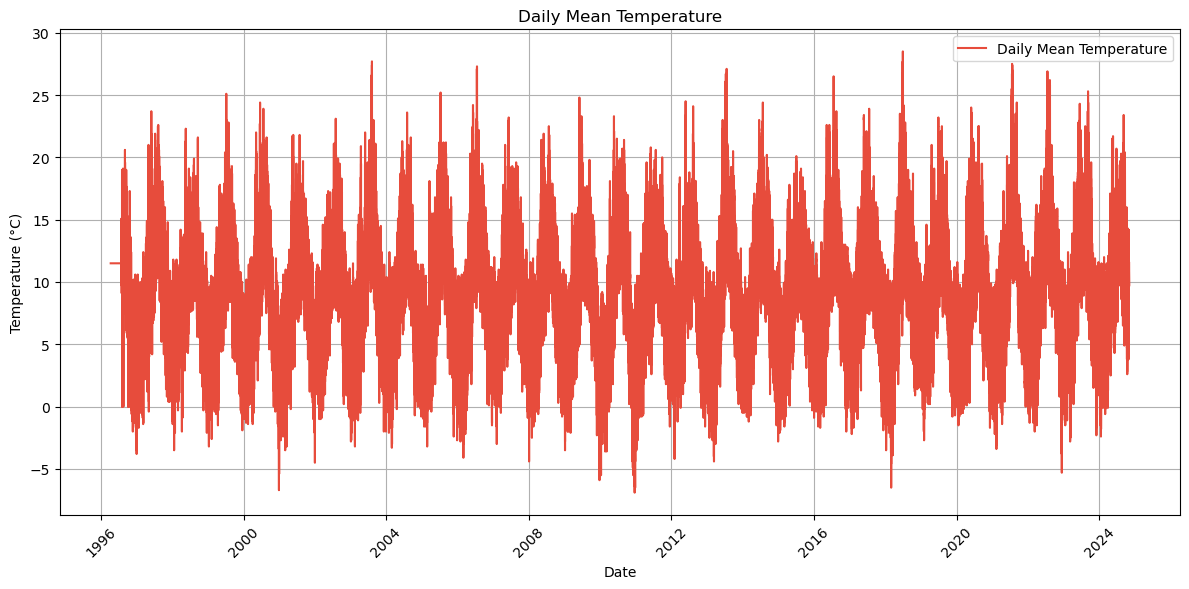

In [56]:
# Calculate the daily mean temperature.
daily_mean_temp= df.groupby('date')['temp'].mean()

# Plotting the daily mean temperature.
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, label='Daily Mean Temperature', color='#e74c3c')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

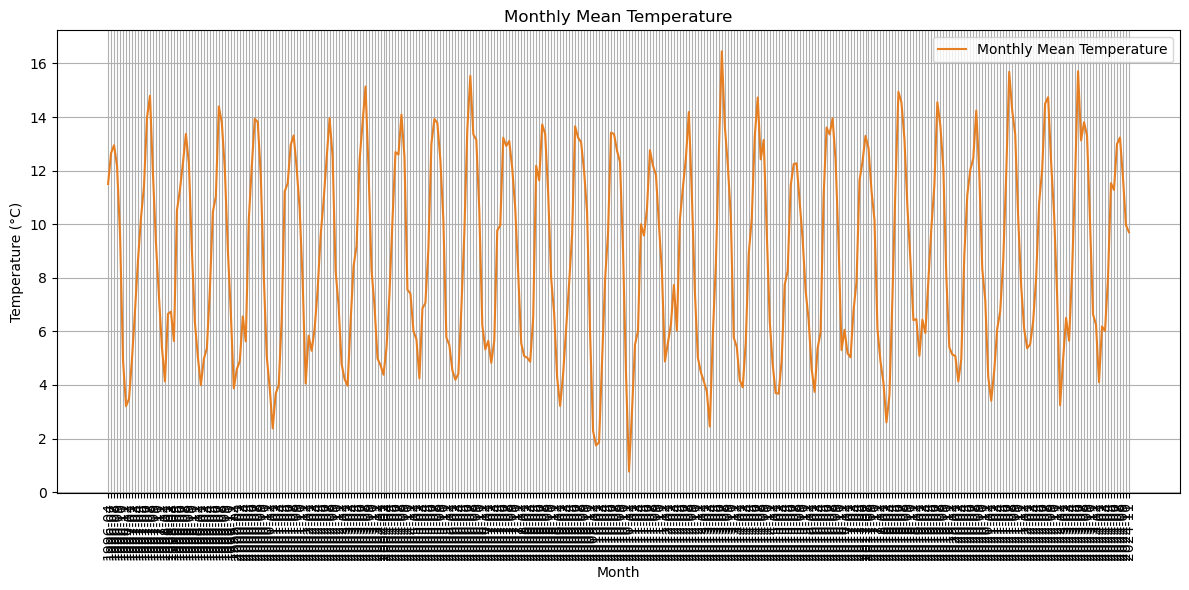

In [57]:
# Calculate the monthly mean temperature.
df['Month'] = df['date'].dt.to_period('M')
monthly_mean_temp = df.groupby('Month')['temp'].mean()

# Plot the monthly mean temperature.
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp.values, label='Monthly Mean Temperature', color='#e67e22')
plt.title('Monthly Mean Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

***
### Plot Windspeed
***

In [58]:
# Drop rows with missing windspeed data.
df = df.dropna(subset=['wdsp'])

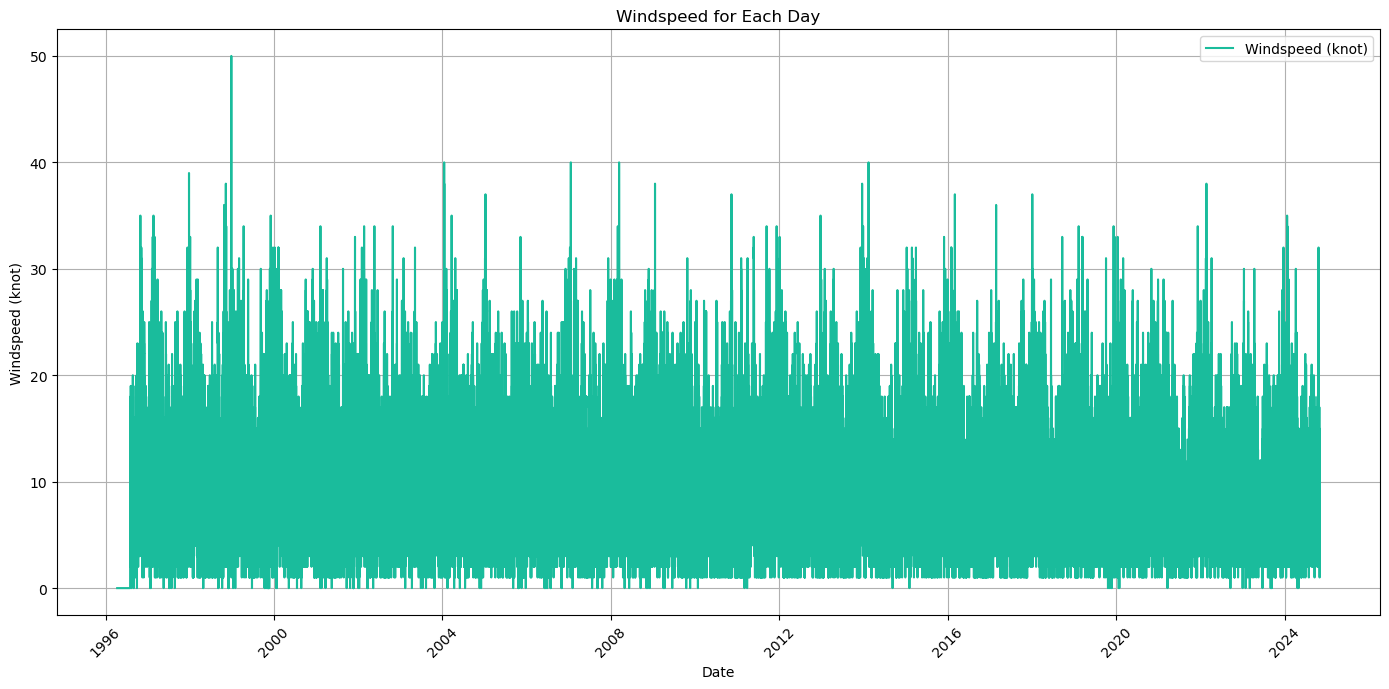

In [59]:
# Plot the Windspeed for each day.
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['wdsp'], label='Windspeed (knot)', color='#1abc9c')
plt.title('Windspeed for Each Day')
plt.xlabel('Date')
plt.ylabel('Windspeed (knot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

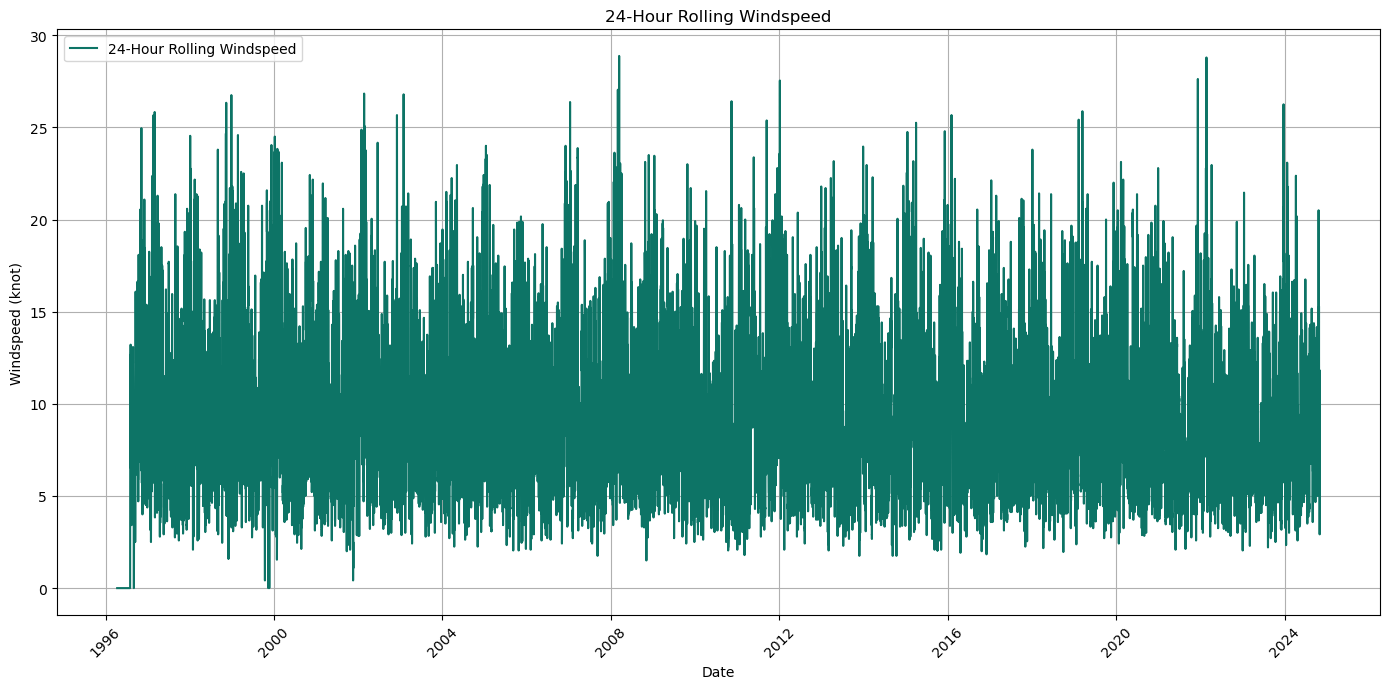

In [60]:
# Step 4: Plot the 24-hour rolling windspeed.
df['Rolling_WindSpeed'] = df['wdsp'].rolling(window=24, min_periods=1).mean()
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['Rolling_WindSpeed'], label='24-Hour Rolling Windspeed', color='#0d7466')
plt.title('24-Hour Rolling Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

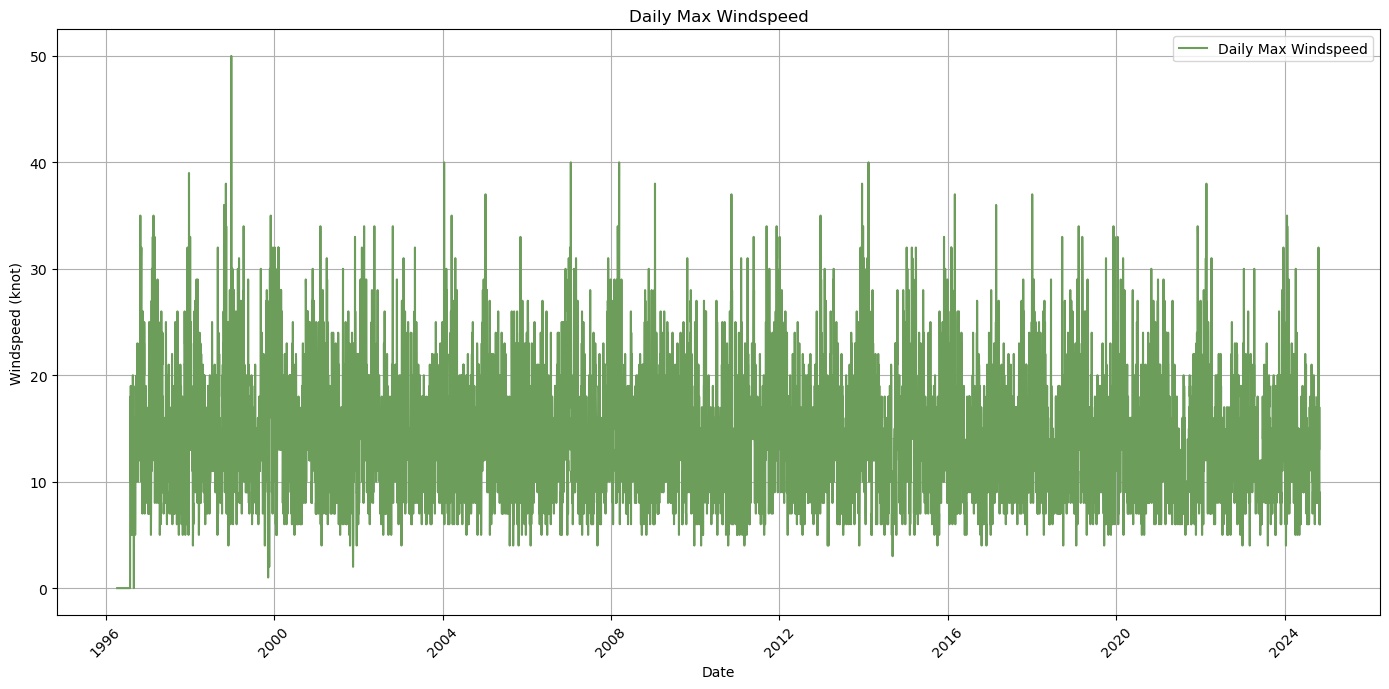

In [61]:
# Step 5: Plot the max windspeed for each day.
daily_max_wind = df.groupby(df['date'].dt.date)['wdsp'].max()
plt.figure(figsize=(14, 7))
plt.plot(daily_max_wind.index, daily_max_wind.values, label='Daily Max Windspeed', color='#6c9d5b')
plt.title('Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

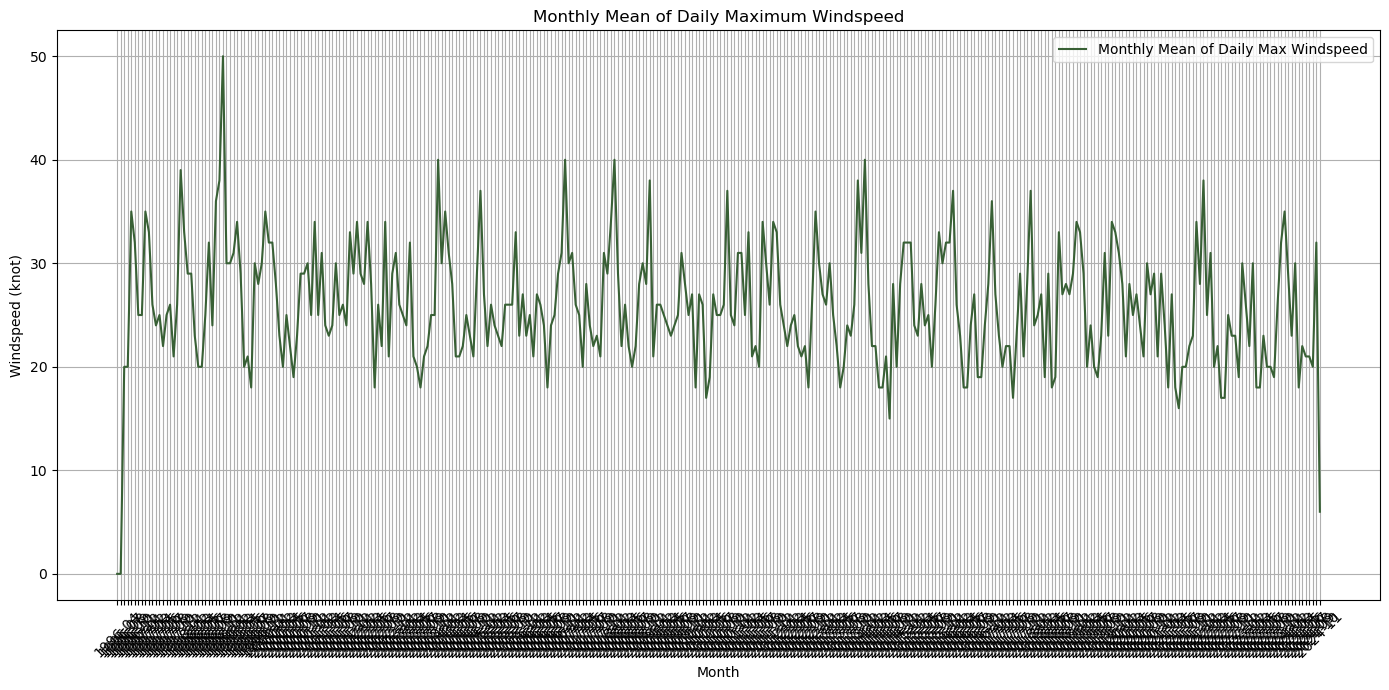

In [62]:
# Plot the monthly mean of daily max windspeed.
df['Month'] = df['date'].dt.to_period('M')
monthly_max_wind = df.groupby('Month')['wdsp'].max()
plt.figure(figsize=(14, 7))
plt.plot(monthly_max_wind.index.astype(str), monthly_max_wind.values, label='Monthly Mean of Daily Max Windspeed', color='#386035')
plt.title('Monthly Mean of Daily Maximum Windspeed')
plt.xlabel('Month')
plt.ylabel('Windspeed (knot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

***
### End